<a href="https://colab.research.google.com/github/ArturoSirvent/TFG_notebooks/blob/main/autoencoders/Overfitting_memory_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
from PIL import Image
import requests

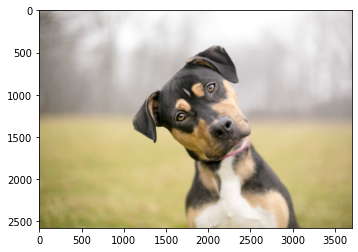

In [ ]:
#los datos seran ruido y el output era una foto de un perro

perro="https://www.cesarsway.com/wp-content/uploads/2019/10/AdobeStock_190562703.jpeg"
im = Image.open(requests.get(perro, stream=True).raw)
plt.imshow(im)
imag=np.array(im)

In [ ]:
imag.shape

(2577, 3700, 3)

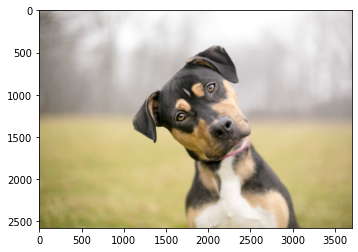

In [ ]:
plt.imshow(imag)

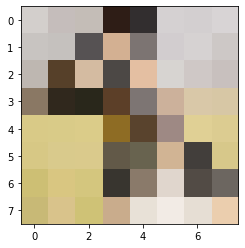

In [ ]:
#vamos a quedarnos con una imagen de 340 x 340 al final
im_final=imag[500:2500,1000:3000]/255.0
im_final2=tf.image.resize(im_final,size=[8,8],method="gaussian" )
plt.imshow(im_final2)

In [ ]:
#ahora creamos un array de features, serán arrray de ruido de 400x400 que reduciremos
n=600
features=np.random.uniform(0,1,(n,400,400,1))
labels=np.array((im_final2,)*n)

In [ ]:
#creamos el modelo
model=tf.keras.Sequential([])
model.add(tf.keras.layers.Conv2D(20,(3,3),input_shape=(400,400,1),activation="relu"))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(20,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(20,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(20,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(20,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(3,(3,3),activation="relu"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 398, 398, 20)      200       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 199, 199, 20)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 197, 197, 20)      3620      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 98, 98, 20)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 96, 96, 20)        3620      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 48, 48, 20)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 46, 46, 20)       

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(1e-5), loss="mse")

In [ ]:
hist=model.fit(features,labels,batch_size=32,epochs=1000)
resultado=model.predict(np.random.uniform(0,1,(1,400,400,1)))
plt.imshow(resultado[0])

Epoch 1/1000


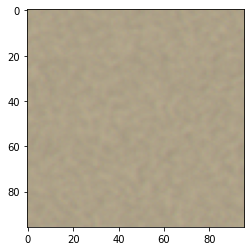

In [ ]:
resultado=model.predict(np.random.uniform(0,1,(1,400,400,1)))
plt.imshow(resultado[0])

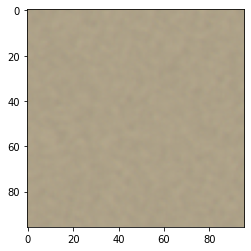

In [ ]:
resultado=model.predict(np.random.uniform(0,1,(1,400,400,1)))
plt.imshow(resultado[0])

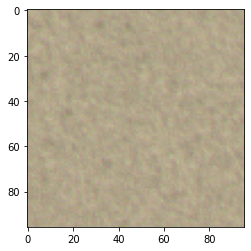

In [ ]:
resultado=model.predict(np.random.uniform(0,1,(1,400,400,1)))
plt.imshow(resultado[0])

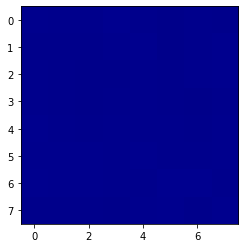

In [ ]:
resultado=model.predict(np.random.uniform(0,1,(1,400,400,1)))
plt.imshow(resultado[0])

In [ ]:
#ahora vamos a intentar que la imagen inicial se nos devuelva talcual